In [1]:
%pylab inline
import pandas
import seaborn
from urllib.request import Request, urlopen
import json

def get_json(url):
    hdr = { 
        'X-TBA-Auth-Key' : '9l2oKd2IBt1TrlCxGhAl6pa6z06rNGcbDQrQ0EXFcMa7eCtPBdltgM5Tc69nwTOo', 
        'User-Agent': 'Mozilla /5.0 (Compatible MSIE 9.0;Windows NT 6.1;WOW64; Trident/5.0)' 
    }
    req = Request(url=url, headers=hdr)
    response = urlopen(req)
    json_text = json.loads(response.read())
    response.close()
    return json_text

Populating the interactive namespace from numpy and matplotlib


In [2]:
json_data = get_json('https://www.thebluealliance.com/api/v3/event/2018nysu/matches')

In [3]:
df = pandas.io.json.json_normalize(data=json_data, meta=[['score_breakdown', 'blue'], ['alliances', 'red']], sep='.')

In [4]:
df['actual_time'] = pandas.to_datetime(df['actual_time'], unit='s')
df['post_result_time'] = pandas.to_datetime(df['post_result_time'], unit='s')
df['actual_time'] = pandas.to_datetime(df['actual_time'], unit='s')
df['time'] = pandas.to_datetime(df['time'], unit='s')
df['predicted_time'] = pandas.to_datetime(df['predicted_time'], unit='s')

## Auto Scores of Alliances Qualification Matches Hudson Valley 2018
Most teams only decided to cross the auton line, some decided to get ownership points

Text(0,0.5,'Number of Teams')

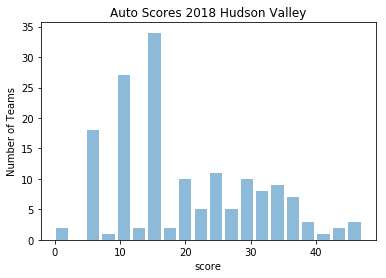

In [5]:
qm = df[df['comp_level'] == 'qm']
auto_scores = [qm['score_breakdown.blue.autoPoints'], qm['score_breakdown.red.autoPoints']]
result = pandas.concat(auto_scores)
hist(result, rwidth=0.8, alpha=0.5, bins=20)
title('Auto Scores 2018 Hudson Valley')
xlabel('score')
ylabel('Number of Teams')